<a href="https://colab.research.google.com/github/Manish-k723/ML-models/blob/main/K_means_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#UNSUPERVISED LEARNING -> CLUSTERING -> K MEANS CLUSTERING
#IN CLUSTERING - THERE IS NO y(OUTPUT), we only consider i/p to train our model

In [ ]:
# 1. Take Data and create Data-Frame
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()
#200 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# INPUT - ANNUAL INCOME AND SPENDING SCORE

In [ ]:
# 4. Separate input columns
x=df.iloc[:,3:5].values

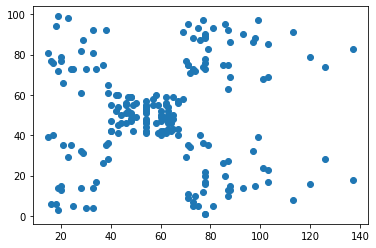

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [ ]:
# Here our main task is to find out the number of clusters(k)
import numpy as np
np.sqrt(200) #200 is the total no. of points
#no. of clusters in - k
# Rule - K value should not exceed the square root of the total no. of points
# Hence K value should be in the range of 2 to 14, 1 is not there because 2 is the minimum requirement 
#because 1 means the Raw Data

14.142135623730951

In [ ]:
# We need to find out the number of clusters(k)
# There are two methods for finding (K)
# 1. ELBOW METHOD - SLIGHTLY CONFUSING
# 2. SILHOUETTER SCORE METHOD - VERY ACCURATE

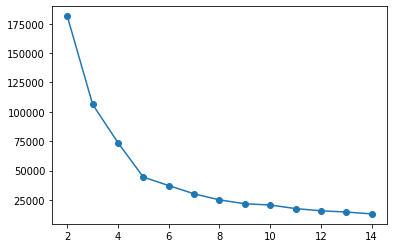

In [ ]:
# 1. ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,15) #my range is in between 2 and 14

sse =[] #blank list
# for i in range(2,15):
for i in k:
  model_demo = KMeans(n_clusters= i, random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_) # .inertia_ -> calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse);

In [ ]:
# We will consider the point at which the elbow is more prominent(projecting from something)
# May k=5 because THE GRAPH IS MORE PROMINENT TOWARDS 5
# We will consider k as 5 for now, but we are not sure
# So for confirmation, Let's check it with SILHOETTE METHOD

2 Clusters, Score = 0.2968969162503008
3 Clusters, Score = 0.46761358158775435
4 Clusters, Score = 0.4931963109249047
5 Clusters, Score = 0.553931997444648
6 Clusters, Score = 0.5379675585622219
7 Clusters, Score = 0.5264283703685728
8 Clusters, Score = 0.45704384633565154
9 Clusters, Score = 0.4563032021725485
10 Clusters, Score = 0.4492169169017592
11 Clusters, Score = 0.437104484577306
12 Clusters, Score = 0.42507724579994494
13 Clusters, Score = 0.4361876168478583
14 Clusters, Score = 0.40466460708668867


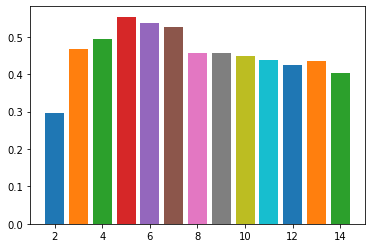

In [ ]:
from sklearn.metrics import silhouette_score
k = range(2,15)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state=0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f'{i} Clusters, Score = {silhouette_score(x,y_pred)}')
  plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
# CONFIRMATION : THE NO. OF CLUSTERES IS CONSIDERED AS 5

In [ ]:
# 7. Applying Clusterer
k=5

model = KMeans(n_clusters = k,random_state=0)
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [ ]:
y = model.predict(x)
y # This tells in which clusters are all point, Like for x=1 its 4 which means 1 has been placed in 4th cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
y.size

200

In [ ]:
x[y == 0,1]
# Here first (1) refers to the cluster number and 2nd (1) is for column index 1
# The value of input when cluster 1 is selected and column index 1 is selected

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

In [ ]:
np.unique(y,return_counts = True) #Statement to check no. of points in each clusters

(array([0, 1, 2, 3, 4], dtype=int32), array([35, 81, 39, 22, 23]))

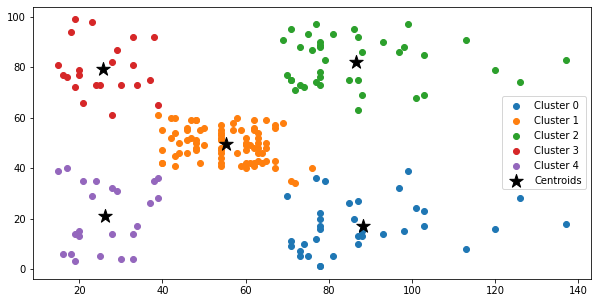

In [ ]:
#Final Visualisation
plt.figure(figsize=(10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label= f'Cluster {i}')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,c='Black',label = 'Centroids',marker ='*');
plt.legend();
